# ERA5: check TXx & TNn anomalies

In [1]:
import matplotlib.pyplot as plt

from utils import era5, utils

In [2]:
CLIMATOLOGY_PERIOD = slice("1961", "1990")

## Load data

In [3]:
txx_orig = era5.load_post(variable="txx").t2m
tnn_orig = era5.load_post(variable="tnn").t2m

In [4]:
land_mask = era5.load_landmask()

## Check land mask

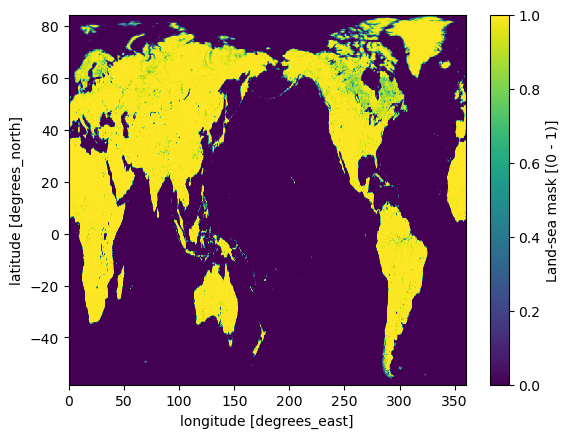

In [5]:
land_mask.plot()

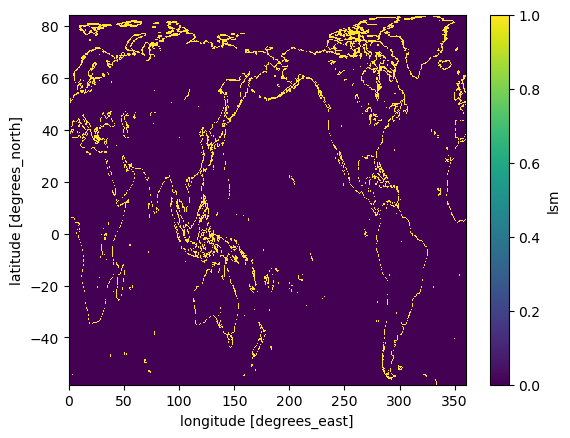

In [6]:
((land_mask > 0) & (land_mask < 0.5)).plot()

## Compute land mean anomalies

In [7]:
txx_land = utils.land_mean(txx_orig, land_mask > 0.5)
tnn_land = utils.land_mean(tnn_orig, land_mask > 0.5)

txx_land = utils.calc_anomaly(txx_land, CLIMATOLOGY_PERIOD)
tnn_land = utils.calc_anomaly(tnn_land, CLIMATOLOGY_PERIOD)

## Plot anomaly time series

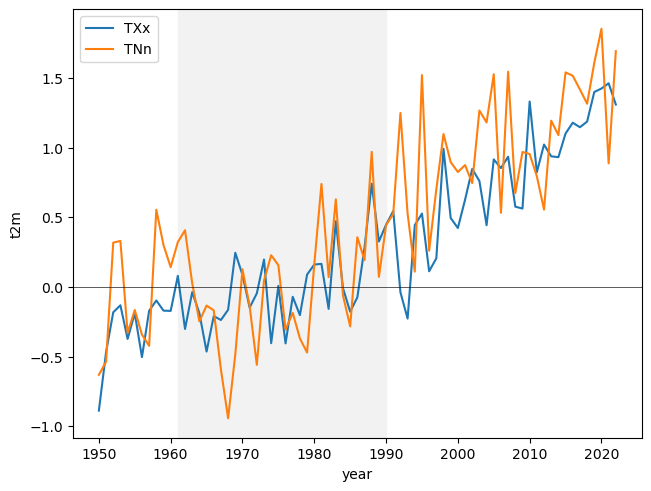

In [8]:
f, ax = plt.subplots(layout="constrained")

txx_land.plot(ax=ax, label="TXx")
tnn_land.plot(ax=ax, label="TNn")

s, e = int(CLIMATOLOGY_PERIOD.start), int(CLIMATOLOGY_PERIOD.stop)
ax.axvspan(s, e, color="0.95")
ax.axhline(0, color="0.1", lw=0.5)

ax.legend()